# Επεξεργασία της αλλαγής με την πάροδο του χρόνου με pandas

Μερικές φορές τα δεδομένα είναι εύκολο να γίνουν γραφική παράσταση και να επικοινωνηθούν και μερικές φορές απαιτούνται μερικά επιπλέον βήματα. Ας ρίξουμε μια ματιά στο. `visas-by-continent.csv`.

In [6]:
import pandas as pd
%matplotlib inline
df = pd.read_csv("data/visas-by-continent.csv")

## Checking

In [7]:
df.dtypes

year               int64
Africa           float64
Asia             float64
Europe           float64
North America    float64
Oceania          float64
South America    float64
Unknown          float64
dtype: object

## Κάνοντας ένα απλό plot

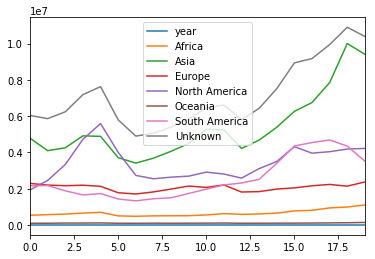

In [8]:
df.plot()

Ο άξονας x είναι χάλια και το "year" δεν είναι χώρα. Ας τα διορθώσουμε.

## Βελτιώνοντας τα δεδομένα βελτιώνουμε το γράφημα

Μπορούμε να βελτιώσουμε τον άξονα x και να απαλλαγούμε από τη στήλη «έτος», αν **φτιάξουμε ένα datetime index.** Αυτό απαιτεί τα ακόλουθα βήματα:

- Να μετατρέψουμε το year σε **datetime column**,
- Να το θέσουμε ώς index,
- να επαναλάβουμε το γράφημα

Να θυμάστε ότι πρέπει εσείς να καθορίζεται το **format** όταν μετατρέπετε μια ημερομηνία.

In [9]:
df['year'] = pd.to_datetime(df['year'], format= '%Y')
df.head()

,year,Africa,Asia,Europe,North America,Oceania,South America,Unknown
0,1997-01-01,534420.0,4779368.0,2290328.0,1934950.0,92818.0,2159310.0,6034989.0
1,1998-01-01,568142.0,4095252.0,2198228.0,2455302.0,94106.0,2170502.0,5860927.0
2,1999-01-01,599452.0,4254634.0,2163808.0,3332712.0,105130.0,1883214.0,6238484.0
3,2000-01-01,655136.0,4912918.0,2190592.0,4723946.0,105670.0,1652472.0,7184174.0
4,2001-01-01,697870.0,4883414.0,2130078.0,5589696.0,111022.0,1730232.0,7624022.0


In [10]:
df.set_index('year', inplace= True)

In [11]:
df.head()

,Africa,Asia,Europe,North America,Oceania,South America,Unknown
year,,,,,,,
1997-01-01,534420.0,4779368.0,2290328.0,1934950.0,92818.0,2159310.0,6034989.0
1998-01-01,568142.0,4095252.0,2198228.0,2455302.0,94106.0,2170502.0,5860927.0
1999-01-01,599452.0,4254634.0,2163808.0,3332712.0,105130.0,1883214.0,6238484.0
2000-01-01,655136.0,4912918.0,2190592.0,4723946.0,105670.0,1652472.0,7184174.0
2001-01-01,697870.0,4883414.0,2130078.0,5589696.0,111022.0,1730232.0,7624022.0


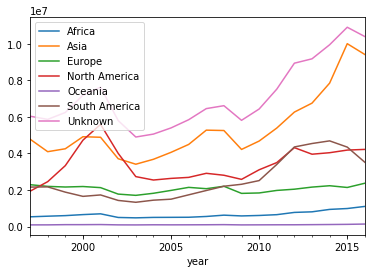

In [12]:
df.plot()

Πώς μπορούμε να συγκρίνουμε την αλλαγή στις θεωρήσεις μεταξύ διαφορετικών ηπείρων όταν οι πληθυσμοί τους είναι τόσο διαφορετικοί;

## Δύσκολες συγκρίσεις γίνονται εύκολες με την αλλαγή ποσοστού

Αν ψάχνουμε σε ένα σύνολο τιμών που είναι σε δισεκατομμύρια και ένα άλλο σε χιλιάδες, είναι **πολύ δύσκολο να φτιάξουμε σε ένα γραφικό .** 

Αντί να εξετάσουμε τις αρχικές τιμές, ένας καλύτερος τρόπος σκέψης είναι **η αλλαγή επί τοις εκατό .** Αν ένα πράγμα ανεβαίνει κατά 10% και το άλλο ανεβαίνει 50%, μπορούμε να κάνουμε μια απλή σύγκριση!

Μπορείτε να το κάνετε αυτό με pandas επιλέγοντας μια στήλη και ζητώντας `.pct_change()`.

In [13]:
df['Oceania'].pct_change()

year
1997-01-01         NaN
1998-01-01    0.013877
1999-01-01    0.117144
2000-01-01    0.005136
2001-01-01    0.050648
2002-01-01   -0.154312
2003-01-01   -0.028672
2004-01-01    0.079739
2005-01-01   -0.031705
2006-01-01    0.018438
2007-01-01    0.029864
2008-01-01    0.061716
2009-01-01   -0.129066
2010-01-01    0.033242
2011-01-01    0.029451
2012-01-01    0.009191
2013-01-01    0.066508
2014-01-01    0.069199
2015-01-01    0.077089
2016-01-01    0.136811
Name: Oceania, dtype: float64

Λείπει η πρώτη τιμή, διότι δεν είχε αλλάξει από κάτι πριν! Μπορείτε επίσης εύκολα **να οπτικοποιήσετε τα αποτελέσματα .**

In [16]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

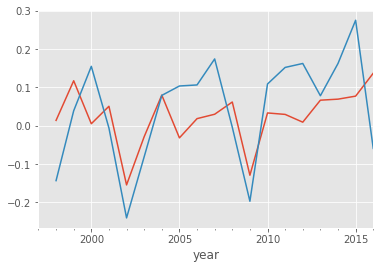

In [17]:
df['Oceania'].pct_change().plot()
df['Asia'].pct_change().plot()

In [18]:
df.pct_change().head()

,Africa,Asia,Europe,North America,Oceania,South America,Unknown
year,,,,,,,
1997-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-01-01,0.063100,-0.143139,-0.040213,0.268923,0.013877,0.005183,-0.028842
1999-01-01,0.055109,0.038919,-0.015658,0.357353,0.117144,-0.132360,0.064419
2000-01-01,0.092892,0.154722,0.012378,0.417448,0.005136,-0.122526,0.151590
2001-01-01,0.065229,-0.006005,-0.027624,0.183268,0.050648,0.047057,0.061225



Αν εξετάσουμε τα δεδομένα μας, **κάθε στήλη είναι μια κατηγορία για την οποία θα θέλαμε να υπολογίσουμε την ποσοστιαία μεταβολή**. Μπορούμε να το κάνουμε αυτό υπολογίζοντας το `df.pct_change()` για κάθε στήλη.

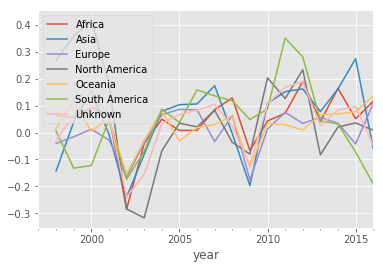

In [19]:
df.pct_change().plot()

Ας το σχεδιάσουμε λίγο μεγαλύτερο με το `figsize`.

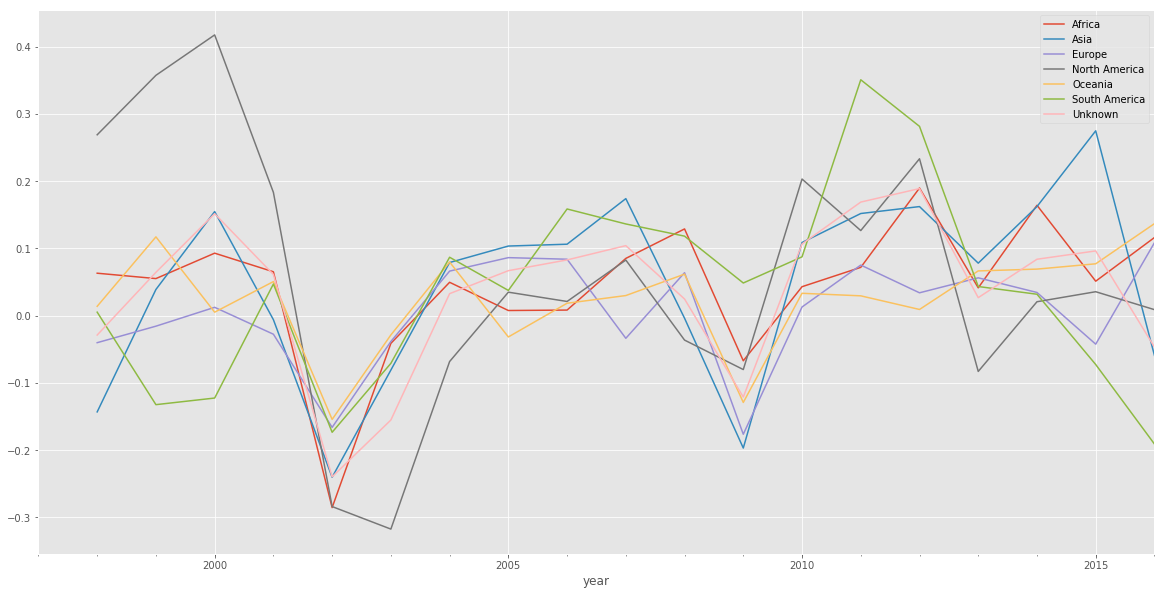

In [20]:
df.pct_change().plot(figsize=(20, 10))

# Long vs. wide data

Το `pct_change` είναι εύκολο όταν έχουμε το σύνολο των δεδομένων μας ως στήλη. Αυτό καθιστά πολλούς άλλους υπολογισμούς όμως πιο δύσκολους. **Οι διαφορετικές προσεγγίσεις ανάλυσης και γραφημάτων απαιτούν διαφορετικές μορφές δεδομένων**.

Το συγκεκριμένο format - κάθε στήλη είναι μια λίστα από παρατηρήσεις ονομάζεται **wide format.** Όσο περισσότερα αντικείμενα έχουμε, τόσο περισσότερες στήλες έχουμε.

In [29]:
wide_df = pd.read_csv("data/visas-by-continent.csv")
wide_df.set_index('year', inplace=True)
wide_df.head()

,Africa,Asia,Europe,North America,Oceania,South America,Unknown
year,,,,,,,
1997,534420.0,4779368.0,2290328.0,1934950.0,92818.0,2159310.0,6034989.0
1998,568142.0,4095252.0,2198228.0,2455302.0,94106.0,2170502.0,5860927.0
1999,599452.0,4254634.0,2163808.0,3332712.0,105130.0,1883214.0,6238484.0
2000,655136.0,4912918.0,2190592.0,4723946.0,105670.0,1652472.0,7184174.0
2001,697870.0,4883414.0,2130078.0,5589696.0,111022.0,1730232.0,7624022.0


In [30]:
df.sum(axis=1)

year
1997-01-01    17826183.00
1998-01-01    17442459.00
1999-01-01    18577434.00
2000-01-01    21424908.00
2001-01-01    22766334.00
2002-01-01    17308311.00
2003-01-01    14644902.00
2004-01-01    15147297.00
2005-01-01    16166853.00
2006-01-01    17510190.00
2007-01-01    19332855.00
2008-01-01    19809228.00
2009-01-01    17412546.00
2010-01-01    19268253.00
2011-01-01    22523817.00
2012-01-01    26781270.00
2013-01-01    27493047.00
2014-01-01    29797440.00
2015-01-01    32675235.72
2016-01-01    31144473.00
dtype: float64

Η άλλη επιλογή λέγεται **long data**, όπου κάθε σειρά είναι μια παρατήρηση με μια κατηγορική μεταβλητή.

In [31]:
long_df = pd.read_csv("data/visas-by-continent-long.csv")
long_df.head()

,year,continent,visas
0,1997,Africa,534420.0
1,1998,Africa,568142.0
2,1999,Africa,599452.0
3,2000,Africa,655136.0
4,2001,Africa,697870.0


## Μετατρέποντας τα long data σε wide data με το `.pivot`

In [32]:
long_df.head(2)

,year,continent,visas
0,1997,Africa,534420.0
1,1998,Africa,568142.0


In [33]:
# Κάνουμε το year index
# Κια φτιάχνουμε στήλες από όλες τις τιμές του 'continent'
# και κάνουμε την στήλη 'visas' γραμμές
long_df.pivot(index='year', columns='continent', values='visas').head()

continent,Africa,Asia,Europe,North America,Oceania,South America,Unknown
year,,,,,,,
1997,534420.0,4779368.0,2290328.0,1934950.0,92818.0,2159310.0,6034989.0
1998,568142.0,4095252.0,2198228.0,2455302.0,94106.0,2170502.0,5860927.0
1999,599452.0,4254634.0,2163808.0,3332712.0,105130.0,1883214.0,6238484.0
2000,655136.0,4912918.0,2190592.0,4723946.0,105670.0,1652472.0,7184174.0
2001,697870.0,4883414.0,2130078.0,5589696.0,111022.0,1730232.0,7624022.0


## Μετατρέποντας τα wide data σε long data με το `.melt`

In [34]:
wide_df.head(2)

,Africa,Asia,Europe,North America,Oceania,South America,Unknown
year,,,,,,,
1997,534420.0,4779368.0,2290328.0,1934950.0,92818.0,2159310.0,6034989.0
1998,568142.0,4095252.0,2198228.0,2455302.0,94106.0,2170502.0,5860927.0


In [35]:
# Βγάζουμε το year έξω, ξανά σαν στήλη
wide_df.head(2).reset_index()

,year,Africa,Asia,Europe,North America,Oceania,South America,Unknown
0,1997,534420.0,4779368.0,2290328.0,1934950.0,92818.0,2159310.0,6034989.0
1,1998,568142.0,4095252.0,2198228.0,2455302.0,94106.0,2170502.0,5860927.0


In [36]:
# μετατροπή της στήλης σε μεταβλητή "CONTINENT"
# και την τιμή από το κελί σε στήλη "VISAS"
# και να τις διαχωρίζουμε με βάση το "year"
wide_df.reset_index().melt(var_name='continent', value_name='visas', id_vars=['year'])

,year,continent,visas
0,1997,Africa,534420.00
1,1998,Africa,568142.00
2,1999,Africa,599452.00
3,2000,Africa,655136.00
4,2001,Africa,697870.00
...,...,...,...
135,2012,Unknown,8933756.00
136,2013,Unknown,9172705.00
137,2014,Unknown,9941932.00
138,2015,Unknown,10898813.24
